# Lab 5 on Berstein--Vazirani Algorithm

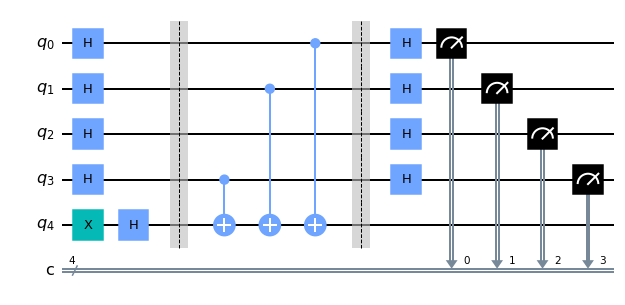

In [7]:
from qiskit import QuantumCircuit, execute, Aer, BasicAer
from qiskit.visualization import plot_histogram

import numpy as np

n =4  # number of qubits used to represent s
s = '1011'   # the hidden binary string

# We need a circuit with n qubits, plus one ancilla qubit
# Also need n classical bits to write the output to
bv_circuit = QuantumCircuit(n+1, n)



# Apply Hadamard gates before querying the oracle
for i in range(n):
    bv_circuit.h(i)
    


# put ancilla in state |->
bv_circuit.x(n)
bv_circuit.h(n)

# Apply barrier 
bv_circuit.barrier()

# Oracle to implement bit string multiplication
 # reverse s to fit qiskit's qubit ordering
i=n-1
for q in s:
    if q == '1':
        bv_circuit.cx(i, n)
    i-=1
        
# Apply barrier 
bv_circuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Measurement
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw('mpl')

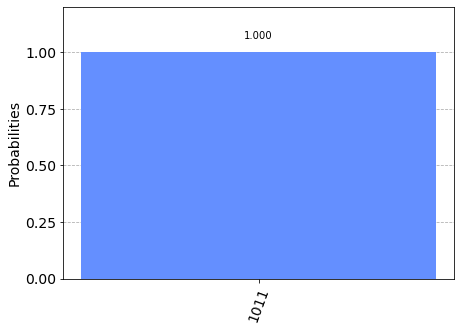

In [8]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
job = execute(bv_circuit, backend=backend, shots=shots)
results=job.result()
answer = results.get_counts()

plot_histogram(answer)

In [9]:
from qiskit import IBMQ


IBMQ.save_account('b7c3d5261ffcdc9163d35371670119c46adb48436e35147c205928aa37c913fcbee976e715f8547f637f98adaff39dee787ff1b5038bac14d34fd69cd8937e28', overwrite=True)

In [11]:
provider=IBMQ.load_account()
backend=provider.get_backend('ibmq_quito')

ibmqfactory.load_account:WARNING:2021-06-22 16:26:34,974: Credentials are already in use. The existing account in the session will be replaced.


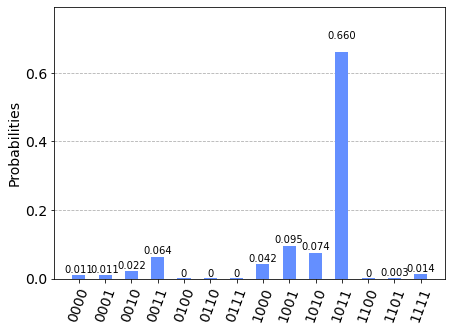

In [12]:
job = execute(bv_circuit, backend=backend, shots=1024)
counts=job.result().get_counts()
plot_histogram(counts)